In [51]:
cls_path = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/fakeavceleb/manual_pre"

In [52]:
import pickle as pkl
import os
import pandas as pd
import torch
import numpy as np

In [37]:
# test fo input anlyse
p = "/storage/slurm/schnackl/fakesync/cav-mae-sync/outputs/vgg_test/input_batch_0.pkl"
audio_input, video_input, labels = pkl.load(open(p, "rb"))
print(audio_input.shape, video_input.shape, labels.shape)

(4, 16, 256, 128) (4, 16, 3, 224, 224) (4,)


Text(0.5, 1.0, 'Audio Input Heatmap')

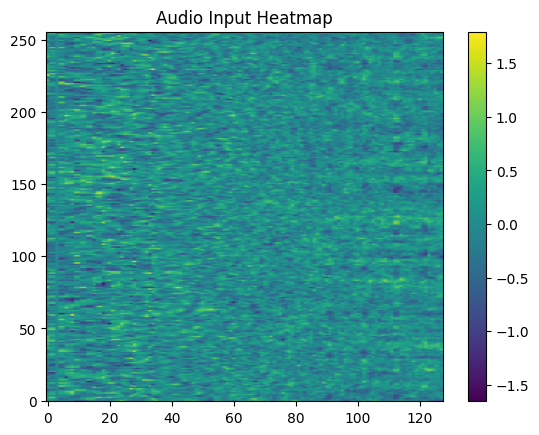

In [44]:
# heatmap of audio input[0][0]
import matplotlib.pyplot as plt
plt.imshow(audio_input[1][4]-audio_input[1][5], aspect='auto', origin='lower')
plt.colorbar()
plt.title('Audio Input Heatmap')

In [75]:
logs = []
files = os.listdir(cls_path)
for file in files[0:2]:
    if file.endswith(".pkl"):
        print("loadeing", file)
        data = pkl.load(open(os.path.join(cls_path, file), "rb"))
        logs.append(data)
        break

loadeing forward_embeddings_6.pkl


In [76]:
df = pd.DataFrame()
for batch in logs:
    df = pd.concat([df, pd.DataFrame(batch)], ignore_index=True)

# sample size
df = df.sample(n=min(df.shape[0],32), random_state=42)

In [ ]:
df.head()

KeyboardInterrupt: 

In [77]:
df.cls_a.iloc[0][:5]

array([[-0.36306894, -0.30408433,  0.23587614, ...,  0.21487106,
        -1.1199789 , -0.5920314 ],
       [-0.36306894, -0.30408433,  0.23587614, ...,  0.21487106,
        -1.1199789 , -0.5920314 ],
       [-0.36306894, -0.30408433,  0.23587614, ...,  0.21487106,
        -1.1199789 , -0.5920314 ],
       [-0.35909164, -0.31650954,  0.34611118, ...,  0.40454924,
        -1.0432137 , -0.27495205],
       [-0.27692324, -0.3124236 ,  0.16358206, ...,  0.35455397,
        -0.88187116, -0.07993272]], shape=(5, 768), dtype=float32)

In [60]:
for col in df.columns:
    print(col, df[col].iloc[0].shape if isinstance(df[col].iloc[0], np.ndarray) else df[col].iloc[0])

video_name FakeVideo-RealAudio-Caucasian (American)-men-id04216-00470_id00945_wavtolip
label 

tensor(1.)
audio_out (16, 128, 768)
video_out (16, 196, 768)
cls_a (16, 768)
cls_v (16, 768)


In [78]:
cls_v = torch.tensor(df.cls_v.iloc[0])
cls_a = torch.tensor(df.cls_a.iloc[0])

In [62]:
print((cls_v[0:16] - cls_v[0]).abs())
print((cls_a[0:16] - cls_a[0]).abs())
print(cls_a)
# print(torch.allclose(video_flat[0], video_flat[1]))

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0065, 0.0110, 0.0390,  ..., 0.0046, 0.0153, 0.0067],
        [0.0386, 0.0316, 0.0765,  ..., 0.0506, 0.0264, 0.0414],
        ...,
        [0.0866, 0.1947, 0.3999,  ..., 0.1536, 0.0381, 0.4176],
        [0.1743, 0.3233, 0.6795,  ..., 0.1823, 0.2074, 0.5739],
        [0.1867, 0.3271, 0.6567,  ..., 0.1727, 0.2026, 0.6114]])
tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [1.0817, 0.8296, 1.1297,  ..., 0.6654, 0.8873, 1.5293],
        [1.0817, 0.8296, 1.1297,  ..., 0.6654, 0.8873, 1.5293],
        [1.0817, 0.8296, 1.1297,  ..., 0.6654, 0.8873, 1.5293]])
tensor([[-0.3631, -0.3041,  0.2359,  ...,  0.2149, -1.1200, -0.5920],
        [-0.3631, -0.3041,  0.2359,  ...,  0.2149, -1.1200, -0.5920],
        [-0.3631, -0.3041,  0.2359,  ...,  0.2149, -1.1200, -0.5

In [63]:
np.mean(df.cls_a.iloc[0], axis=0)
# only first entry similar

array([-9.53433573e-01,  4.33584005e-02,  7.50265777e-01, -2.49786824e-01,
       -5.47578454e-01,  1.52839750e-01,  1.73606312e+00, -1.92126110e-01,
        8.17426562e-01,  9.30315197e-01, -6.40513718e-01, -1.04709673e+00,
       -1.64320201e-01,  6.71018362e-01,  4.23066556e-01,  9.76308286e-01,
       -9.54057217e-01,  1.22999763e+00,  4.04528044e-02, -3.27438802e-01,
        7.14093626e-01, -7.86620021e-01, -8.68780494e-01,  4.07370776e-01,
        4.10530329e-01,  8.50315019e-02, -1.66920170e-01,  2.85576403e-01,
        1.65422648e-01,  2.05676369e-02,  1.37924409e+00, -6.61333084e-01,
        2.28080153e-01,  8.52547660e-02, -5.53034842e-02, -2.34757781e-01,
        6.20690048e-01,  3.96408021e-01, -8.29559803e-01,  1.44666266e+00,
        1.72218585e+00, -2.84396827e-01, -8.91421497e-01,  5.33212662e-01,
       -3.08363736e-01, -2.37923920e-01, -1.69655585e+00, -6.15724504e-01,
        1.06147063e+00, -6.13201857e-01, -4.16926801e-01,  8.41075659e-01,
        6.46228641e-02,  

In [64]:
df.head()

,video_name,label,audio_out,video_out,cls_a,cls_v
29,FakeVideo-RealAudio-Caucasian (American)-men-i...,tensor(1.),"[[[-0.13078342, -0.14316632, -0.32071874, -0.0...","[[[-0.23373611, -0.93327165, 0.6601757, 0.2926...","[[-0.36306894, -0.30408433, 0.23587614, -0.319...","[[-0.48982555, -0.4940598, 1.2776781, 0.750009..."
15,FakeVideo-RealAudio-Caucasian (European)-women...,tensor(1.),"[[[-1.2313592, -0.64621705, 0.26229703, -0.548...","[[[-0.8183506, 1.3604027, -0.39615712, 1.41958...","[[-1.3717408, -0.08595918, 0.6551377, -0.42114...","[[-0.27566385, 0.46855858, -1.3501366, 0.60352..."
24,FakeVideo-RealAudio-Asian (East)-women-id00763...,tensor(1.),"[[[0.73315555, -0.58837587, -0.44011542, -0.23...","[[[-0.6242455, -0.4647588, 0.37836, 1.079371, ...","[[0.13083157, -0.5608424, 0.18178716, -0.41167...","[[-0.051631495, -0.979478, 0.9636331, 0.977677..."
17,FakeVideo-RealAudio-African-women-id00592-0001...,tensor(1.),"[[[0.578912, -0.50614977, -0.08634101, -0.3083...","[[[-0.518939, 0.5560035, 0.4445462, 1.3620703,...","[[0.14830263, -0.66733325, 0.2534208, -0.36782...","[[-0.20099662, -0.08192878, -0.24644583, 0.785..."
8,FakeVideo-RealAudio-African-women-id00568-0038...,tensor(1.),"[[[0.7678594, -0.7508636, -0.09238289, 0.05445...","[[[-0.62831026, 0.8159916, -0.98712486, 0.5195...","[[0.07593258, -0.48246554, 0.14361566, -0.2958...","[[-0.27905196, 0.34282872, -1.1172652, 0.61399..."


In [74]:
df.cls_v.iloc[0]

array([[-0.48982555, -0.4940598 ,  1.2776781 , ...,  0.07863346,
         0.05199256, -0.08633741],
       [-0.48982555, -0.4940598 ,  1.2776781 , ...,  0.07863346,
         0.05199256, -0.08633741],
       [-0.48982555, -0.4940598 ,  1.2776781 , ...,  0.07863346,
         0.05199256, -0.08633741],
       ...,
       [-0.4306095 , -0.4519224 ,  1.359078  , ...,  0.0258627 ,
         0.00330207, -0.02886122],
       [-0.40262538, -0.4730376 ,  1.2267036 , ...,  0.12631223,
         0.04547972, -0.07816629],
       [-0.48337382, -0.48301455,  1.238688  , ...,  0.07407768,
         0.06728103, -0.09299526]], shape=(16, 768), dtype=float32)

In [16]:
df.cls_a.iloc[0].shape

(16, 768)

In [81]:
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
# do per time step the cosine sim between cls_a and cls_b
cos_sim = cosine_similarity(
    np.array(df.cls_a.iloc[0]),
    np.array(df.cls_v.iloc[0])
)
cos_sim

array([[-3.01120570e-03, -2.96027400e-03, -7.00745732e-04,
        -1.21091865e-03, -6.34086318e-05,  8.32639169e-04,
        -2.46084249e-03, -1.88730890e-03, -3.28872167e-03,
        -2.39087665e-03, -1.55026326e-03,  8.16390850e-04,
         9.65978485e-04, -9.17785277e-04, -1.27944537e-03,
        -2.54712766e-04],
       [-3.01120570e-03, -2.96027400e-03, -7.00745732e-04,
        -1.21091865e-03, -6.34086318e-05,  8.32639169e-04,
        -2.46084249e-03, -1.88730890e-03, -3.28872167e-03,
        -2.39087665e-03, -1.55026326e-03,  8.16390850e-04,
         9.65978485e-04, -9.17785277e-04, -1.27944537e-03,
        -2.54712766e-04],
       [-3.01120570e-03, -2.96027400e-03, -7.00745732e-04,
        -1.21091865e-03, -6.34086318e-05,  8.32639169e-04,
        -2.46084249e-03, -1.88730890e-03, -3.28872167e-03,
        -2.39087665e-03, -1.55026326e-03,  8.16390850e-04,
         9.65978485e-04, -9.17785277e-04, -1.27944537e-03,
        -2.54712766e-04],
       [-6.80552982e-03, -6.94015855e

In [80]:
df.cls_a.iloc[0]

array([[-0.36306894, -0.30408433,  0.23587614, ...,  0.21487106,
        -1.1199789 , -0.5920314 ],
       [-0.36306894, -0.30408433,  0.23587614, ...,  0.21487106,
        -1.1199789 , -0.5920314 ],
       [-0.36306894, -0.30408433,  0.23587614, ...,  0.21487106,
        -1.1199789 , -0.5920314 ],
       ...,
       [-1.4447371 ,  0.5254676 ,  1.3655878 , ...,  0.880291  ,
        -0.2326409 , -2.121333  ],
       [-1.4447371 ,  0.5254676 ,  1.3655878 , ...,  0.880291  ,
        -0.2326409 , -2.121333  ],
       [-1.4447371 ,  0.5254676 ,  1.3655878 , ...,  0.880291  ,
        -0.2326409 , -2.121333  ]], shape=(16, 768), dtype=float32)

In [79]:
import numpy as np
A = np.array(df.cls_a.iloc[0])  # shape (T, D)
V = np.array(df.cls_v.iloc[0])  # shape (T, D)
# A, V: shape (T, D)
A_norm = A / np.linalg.norm(A, axis=1, keepdims=True)
V_norm = V / np.linalg.norm(V, axis=1, keepdims=True)

# elementwise dot product across features → cosine similarity per timestep
similarities = np.sum(A_norm * V_norm, axis=1)  # shape (T,)
similarities

array([-0.00301119, -0.00296028, -0.00070073, -0.00516766,  0.00137426,
        0.00374424,  0.0009279 ,  0.00187644, -0.00412952, -0.01163178,
       -0.01610512, -0.00982513, -0.01035698, -0.00619052, -0.00850229,
       -0.01015509], dtype=float32)

In [70]:
import random

In [71]:
a = df.cls_a.iloc[0]
b = df.cls_v.iloc[0]
b_shuffled = b
random.shuffle(b_shuffled)
y = cosine_similarity(a, b)
# histogram of y
import matplotlib.pyplot as plt

plt.hist(y, bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Histogram of Cosine Similarity between cls_a and cls_v')
plt.show()

NameError: name 'cosine_similarity' is not defined

In [ ]:
# tsne plot of cls_a and cls_v
from sklearn.manifold import TSNE   
import numpy as np
tsne = TSNE(n_components=2, random_state=0, perplexity=5)
a_2d = tsne.fit_transform(a)

# scatter plot of a_2d
plt.scatter(a_2d[:, 0], a_2d[:, 1], c='blue', label='cls_a')
b_2d = tsne.fit_transform(b)
plt.scatter(b_2d[:, 0], b_2d[:, 1], c='red', label='cls_v')
plt.xlabel('TSNE Dimension 1')
plt.ylabel('TSNE Dimension 2')
plt.title('TSNE plot of cls_a and cls_v')
plt.legend()

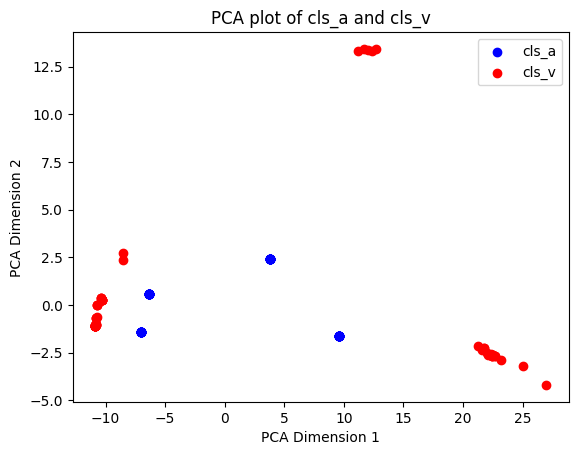

In [ ]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
a_2d_pca = pca.fit_transform(a)
b_2d_pca = pca.fit_transform(b)
# scatter plot of a_2d_pca and b_2d_pca
plt.scatter(a_2d_pca[:, 0], a_2d_pca[:, 1], c='blue', label='cls_a')
plt.scatter(b_2d_pca[:, 0], b_2d_pca[:, 1], c='red', label='cls_v')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('PCA plot of cls_a and cls_v')
plt.legend()
plt.show()

In [ ]:
np.sum(np.abs(np.array(logs[0][5][0]) - np.array(logs[0][5][3])))

/tmp/ipykernel_1627056/2195032062.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  np.sum(np.abs(np.array(logs[0][5][0]) - np.array(logs[0][5][3])))


np.float32(50.678024)

In [ ]:
# scatter plot of cls_a vs cls_v